# ИАД-6
## НИУ ВШЭ, 2020-2021 учебный год

### Домашнее задание №2 Классификация, детекция.

Задание выполнил(а): Дарья Матяш

#Часть 1. Классификация
В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в датасете есть. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train и val, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат собственно сами изображения.
 
__Задание__. Добейтесь accuracy **не менее 0.44**. Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи/блогпосты/вопросы на stackoverflow/видосы от (индийских) ютуберов/курсы/подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

В коде ниже необходимо, чтобы код проходил все `assert`'ы.

Необходимо написать функцию `predict` по шаблону ниже. Эта функция принимает на вход модель, даталоадер с валидационнами данными, criterion для подсчёта лосса и device, на котором будут производиться вычисления (определён ниже) и возвращает список лоссов по всем объектам, список из предсказанных классов для каждого объекта из из даталоалера и список из настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено__. Можно использовать предобученные модели из `torchvision`.

__Критерии оценки__: Оценка вычисляется по простой формуле: min(5, 5 * Ваша accuracy / 0.44). Оценка округляется до десятых по арифметическим правилам.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать на защите :)
 - Используйте аугментации. Для этого пользуйтесь модулем torchvision.transforms или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - (ещё раз) Можно файнтюнить предобученные модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом ImageFolder), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы отладить код, пробуйте обучаться на маленькой части датасета. Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать гпу. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
import sys
import matplotlib.pyplot as plt
import glob

In [ ]:
torch.cuda.is_available()

True

In [ ]:
! wget -O dataset.zip https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/8st61z1rzysuTg && unzip dataset.zip > /dev/null


--2020-11-25 15:16:07--  https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/8st61z1rzysuTg
Resolving getfile.dokpub.com (getfile.dokpub.com)... 78.46.92.107
Connecting to getfile.dokpub.com (getfile.dokpub.com)|78.46.92.107|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://downloader.disk.yandex.ru/disk/ae287179ed1f6362d7fceb87b14c4bd3129b58251c03ecfc757971e4301b2404/5fbea1a7/9ku0RfoqgvhHN2N0OIFZzwFzIpxzFy3Ft7lcfhpvA-MYbw_t_YEo4iyIlXcEv1O9aaW25jUaiufBSppwkoDdTg%3D%3D?uid=0&filename=dataset_2.zip&disposition=attachment&hash=ug7zBL/wR9CIVfYIXuiBmygTGwzITjRbhveIdfcTa1Aj46BI59AtZ7nziVp2Aq1Pq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=application%2Fzip&owner_uid=179646945&fsize=269617549&hid=4c3b0ea0738eff97155fb82f70216640&media_type=compressed&tknv=v2 [following]
--2020-11-25 15:16:07--  https://downloader.disk.yandex.ru/disk/ae287179ed1f6362d7fceb87b14c4bd3129b58251c03ecfc757971e4301b2404/5fbea1a7/9ku0RfoqgvhHN2N0OIFZzwFzIpxzF

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Resize, Normalize, ToTensor, Compose

train_set = ImageFolder("/content/dataset_2/dataset/train", transform=Compose([Resize((224, 224)), ToTensor(), Normalize((0.5, 0.5, 0.5), (1, 1, 1))]))
test_set = ImageFolder("/content/dataset_2/dataset/val", transform=Compose([Resize((224, 224)), ToTensor(), Normalize((0.5, 0.5, 0.5), (1, 1, 1))]))

In [ ]:
# Just very simple checks
assert isinstance(train_set[0], tuple)
assert len(train_set[0]) == 2
assert isinstance(train_set[1][1], int)
print("tests passed")

tests passed


In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=256, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(test_set, batch_size=256, shuffle=True)

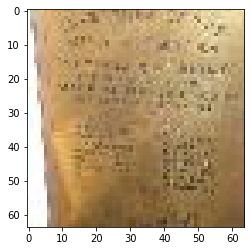

In [ ]:
file = np.random.choice(glob.glob("./dataset_2/dataset/train/*/*.jpg"))
plt.imshow(plt.imread(file))

In [ ]:
from torchvision.models import resnet18

# Загрузить предобученную сеть -- pretrained=True
model = resnet18(pretrained=True).to('cuda')

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
model.fc = nn.Linear(512, 200).to('cuda')

In [ ]:
from tqdm import tqdm
import sys
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import accuracy_score

def train_epoch(epoch,model, data_loader, criterion, optimizer, device="cuda:0"):
    model.train()
    model = model.to(device).train()
    total_loss = 0
    num_batches = 0
    all_losses = []
    total_predictions = np.array([])#.reshape((0, ))
    total_labels = np.array([])#.reshape((0, ))
    with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
      for i, batch in enumerate(data_loader):
        images, labels = batch[0], batch[1]
        # for images, labels in data_loader:
              # Move Batch to GPU
        images = images.to(device)
        labels = labels.to(device)
        predicted = model(images)
        loss = criterion(predicted, labels)
              # Update weights
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
              # Update descirption for tqdm
        accuracy = (predicted.argmax(1) == labels).float().mean()
        prbar.set_description(
                  f"Loss: {round(loss.item(), 4)} "
                  f"Accuracy: {round(accuracy.item() * 100, 4)}"
              )
        prbar.update(1)
        total_loss += loss.item()
        total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
        total_labels = np.append(total_labels, labels.cpu().detach().numpy())
        num_batches += 1
        all_losses.append(loss.detach().item())
    metrics = {'loss': total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})
    PATH = './model_epoch{}'.format(epoch)
    torch.save(model.state_dict(), PATH)
    return_losses = True
    if return_losses:
        return metrics, all_losses
    else:
        return metrics
    

def predict(model, data_loader, criterion, device="cuda:0"):
    model.eval()
    losses = np.zeros(len(data_loader))
    # predict val_dataloader and print and return the validation accuracy
    total_loss = 0
    num_batches = 0
    total_predictions = np.array([])
    total_labels = np.array([])
    with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
      for i, batch in enumerate(data_loader):
        images, labels = batch[0], batch[1]
        images = images.to(device)
        labels = labels.to(device)
        predicted = model(images)
        loss = criterion(predicted, labels)
        accuracy = (predicted.argmax(1) == labels).float().mean()
        prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
        prbar.update(1)
        total_loss += loss.item()
        total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
        total_labels = np.append(total_labels, labels.cpu().detach().numpy())
        losses[i] = loss
        num_batches += 1
#     metrics = {'loss': total_loss / num_batches}
#     metrics.update({"accuracy": (total_predictions == total_labels).mean()})
    
    return losses, total_predictions, total_labels


def validate(model, data_loader, criterion, device='cuda:0'):
    model = model.eval()
    total_loss = 0
    num_batches = 0
    total_predictions = np.array([])
    total_labels = np.array([])
    with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)
            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
            total_labels = np.append(total_labels, labels.cpu().detach().numpy())
            num_batches += 1
    metrics = {'loss': total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})
    return metrics


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):
    model.to(device)
        # Train, evaluate, print accuracy, make a step of scheduler or whatever you want...
    all_train_losses = []
    epoch_eval_accuracy = []
    epoch_train_losses = []
    epoch_eval_losses = []
    for epoch in range(n_epochs):
        # Train step
        print(f"Train Epoch: {epoch}")
        train_metrics, one_epoch_train_losses = train_epoch(epoch,
            model=model,
            data_loader=train_dataloader,
            optimizer=optimizer,
            
            criterion=criterion)
        # Save Train losses
        all_train_losses.extend(one_epoch_train_losses)
        epoch_train_losses.append(train_metrics['loss'])
        # Eval step
        print(f"Validation Epoch: {epoch}")
        with torch.no_grad():
            validation_metrics = validate(
                model=model,
                data_loader=val_dataloader,
                criterion=criterion
            )
        # Save eval losses
        epoch_eval_losses.append(validation_metrics['loss'])
        epoch_eval_accuracy.append(validation_metrics['accuracy'])


In [ ]:
# model = # THE MODEL THAT YOU CHOOSE - загрузила резнет до этого
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), 1e-4)

n_epochs = 10
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

Сейчас поставим все обучаться) Я сохраняю веса на каждой эпохе, чтобы потом загрузить лучшую модель (если вдруг коллаб вылетит) и не терять время.

In [ ]:
torch.manual_seed(42)
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs)

Train Epoch: 0
Loss: 4.1691 Accuracy: 23.75: 100%|██████████| 391/391 [04:50<00:00,  1.34it/s]
Validation Epoch: 0
Loss: 3.9875 Accuracy: 37.5: 100%|██████████| 40/40 [00:28<00:00,  1.42it/s]
Train Epoch: 1
Loss: 3.3279 Accuracy: 46.875: 100%|██████████| 391/391 [04:43<00:00,  1.38it/s]
Validation Epoch: 1
Loss: 3.3572 Accuracy: 31.25: 100%|██████████| 40/40 [00:27<00:00,  1.44it/s]
Train Epoch: 2
Loss: 3.0712 Accuracy: 43.125: 100%|██████████| 391/391 [04:43<00:00,  1.38it/s]
Validation Epoch: 2
Loss: 2.5369 Accuracy: 68.75: 100%|██████████| 40/40 [00:27<00:00,  1.43it/s]
Train Epoch: 3
Loss: 2.2625 Accuracy: 61.25: 100%|██████████| 391/391 [04:41<00:00,  1.39it/s]
Validation Epoch: 3
Loss: 2.302 Accuracy: 50.0: 100%|██████████| 40/40 [00:27<00:00,  1.44it/s]
Train Epoch: 4
Loss: 2.1746 Accuracy: 60.0: 100%|██████████| 391/391 [04:41<00:00,  1.39it/s]
Validation Epoch: 4
Loss: 2.5922 Accuracy: 43.75: 100%|██████████| 40/40 [00:27<00:00,  1.45it/s]
Train Epoch: 5
Loss: 2.0926 Accuracy:

In [ ]:
def evaluate(model, data_loader, criterion, device='cuda:0'):
    model = model.eval()
    total_loss = 0
    num_batches = 0
    total_predictions = np.array([])
    total_labels = np.array([])
    with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
      for i, batch in enumerate(data_loader):
        images, labels = batch[0], batch[1]
        images = images.to(device)
        labels = labels.to(device)
        predicted = model(images)
        loss = criterion(predicted, labels)
        accuracy = (predicted.argmax(1) == labels).float().mean()
        prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
        prbar.update(1)
        total_loss += loss.item()
        total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
        total_labels = np.append(total_labels, labels.cpu().detach().numpy())
        num_batches += 1
    metrics = {'loss': total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})
    return metrics

Я загрузила модель epoch2 и для нее считаю accuracy все такое (в том числе и свою оценочку за это задание) 

In [ ]:
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=256, shuffle=True)
# model = resnet18(pretrained=True).to('cuda')
# model.fc = nn.Linear(512, 200).to('cuda')
# model.load_state_dict(torch.load('/content/model_epoch9'))
# model.eval() 
#  я открывала сравнить качество модели на эпохе 2 и последней эпохе, для ответа, понятно, выводила результаты, полученные, на последней эпохе

all_losses, predicted_labels, true_labels = predict(model, test_dataloader, criterion, device)


Loss: 1.579 Accuracy: 68.75: 100%|██████████| 40/40 [00:29<00:00,  1.35it/s]


In [ ]:
assert len(predicted_labels) == len(test_set)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5*accuracy / 0.44)))

Оценка за это задание составит 5 баллов


In [ ]:
accuracy

0.5656

__Мой отчёт о проделанных экспериментах__:
+ не очень умная идея была не использовать fine-tuning, а написать все "с нуля" на ResNet - accracy была значительно ниже полученной при fine-tuning'е, к тому же на transfer learning'e нейросеть сошлась значительно быстрее, чем инициализированная с нуля.
+ очень помогла аугментация - ресайз и общая нормализация картинок дали лучше качество, чем без этого, для бонусного задания, понятно дело, еще больше всего нужно "навертеть", но для базового задания с accuracy > 0.44 на тестовом датасете тоже ок)